# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

From summary statistics we conclude:
    +Capomulin and Ramicane were also the more successful drugs in reducing the tuor size of the tumors.
The bar graph showed:
- the Drug Regimen Capomulin has the maximum mice number, and Propriva has the smaller mice number.
the pie graph showed that:
   By removing duplicates the total number of mice is 248. The total percentage of male mice is more than the female one(51% vs    49%)

for a mouse treated with Capomulin:
    -The correlation between mouse weight, and average tumor volume is 0.84. It is a strong positive correlation, when the mouse       weight increases the average tumor volume also increases.
    -the R-squared value is 0.70, which means 70% the model fit the data, Higher R-squared values represent smaller differences        between the observed data, and the fitted value. 


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results,mouse_metadata,how='outer', on="Mouse ID")

# Display the data table for preview
combined_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice.249
mice_count=len(combined_df["Mouse ID"].unique())
mice_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. array(['g989'], dtype=object)
dup_mice_ID = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [18]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
dup_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_DataFrame=combined_df[combined_df['Mouse ID'].isin(dup_mice_ID)==False]
clean_DataFrame.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [31]:
clean_DataFrame.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [24]:
# Checking the number of mice in the clean DataFrame.
new_mice_count=len(clean_DataFrame["Mouse ID"].unique())
new_mice_count

248

## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Mean = clean_DataFrame['Tumor Volume (mm3)'].groupby(clean_DataFrame['Drug Regimen']).mean()
Median = clean_DataFrame['Tumor Volume (mm3)'].groupby(clean_DataFrame['Drug Regimen']).median()
VAR = clean_DataFrame['Tumor Volume (mm3)'].groupby(clean_DataFrame['Drug Regimen']).var()
STD = clean_DataFrame['Tumor Volume (mm3)'].groupby(clean_DataFrame['Drug Regimen']).std()
SEM = clean_DataFrame['Tumor Volume (mm3)'].groupby(clean_DataFrame['Drug Regimen']).sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_df = pd.DataFrame({"Mean Tumor Volume":Mean, 
                            "Median Tumor Volume":Median, 
                           "Tumor Volume Variance":VAR, 
                           "Tumor Volume Std. Dev.":STD, 
                           "Tumor Volume Std. Err.":SEM})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_aggregation =  clean_DataFrame.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

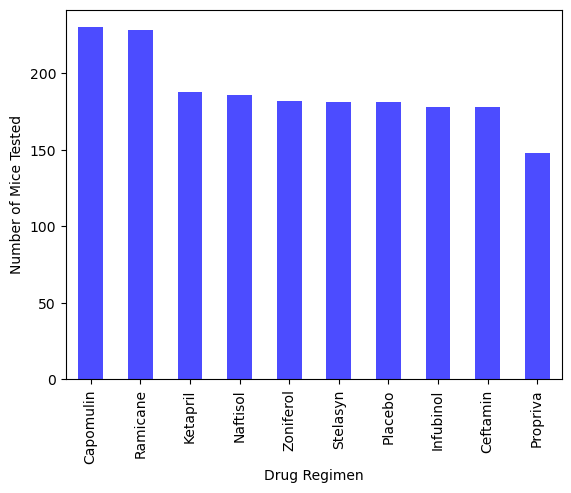

In [46]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_mice_count = clean_DataFrame["Drug Regimen"].value_counts()
drug_mice_count.plot(kind="bar",color="blue",xlabel="Drug Regimen",ylabel="Number of Mice Tested",alpha=0.7)


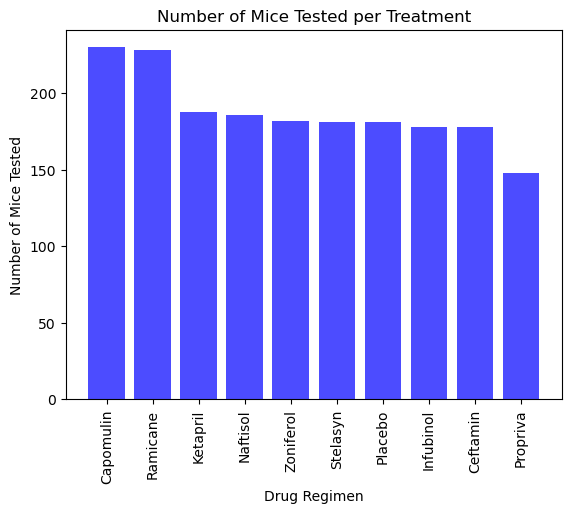

In [48]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_mice_count = clean_DataFrame["Drug Regimen"].value_counts()
x_axis = Drug_mice_count.index.values
y_axis = Drug_mice_count.values
plt.bar(x_axis, y_axis, color='b', alpha=0.7, align='center')
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")

plt.show()


<AxesSubplot:title={'center':'Female vs. Male Mice'}, ylabel='Sex'>

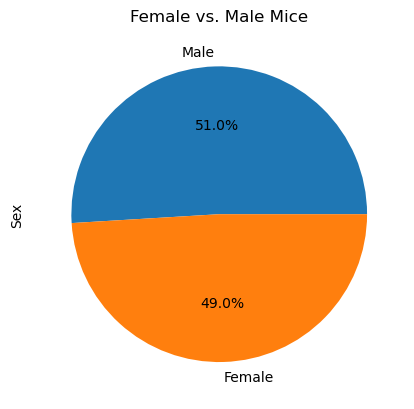

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_DataFrame["Sex"].value_counts()
gender_data.plot(kind="pie",autopct= "%1.1f%%",title="Female vs. Male Mice")



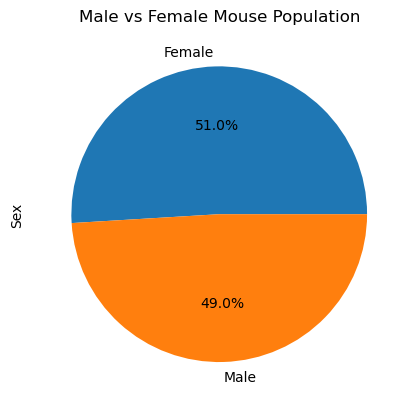

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_data = clean_DataFrame["Sex"].value_counts()
labels = ['Female', 'Male']
plt.pie(gender_data,labels=labels, autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [66]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_DataFrame.loc[clean_DataFrame["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_DataFrame.loc[clean_DataFrame["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_DataFrame.loc[clean_DataFrame["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_DataFrame.loc[clean_DataFrame["Drug Regimen"] == "Ceftamin", :]
# Start by getting the last (greatest) timepoint for each mouse

Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Ramicane_vol = pd.DataFrame(Ramicane_last)
Infubinol_vol = pd.DataFrame(Infubinol_last)
Ceftamin_vol = pd.DataFrame(Ceftamin_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_merge = pd.merge(Capomulin_vol, clean_DataFrame, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge = pd.merge(Ramicane_vol, clean_DataFrame, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge = pd.merge(Infubinol_vol, clean_DataFrame, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_DataFrame, on=("Mouse ID","Timepoint"),how="left")


In [79]:
# Put treatments into a list for for loop (and later for plot labels)

drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = combined_df[combined_df["Drug Regimen"].isin(drug_list)]
drugs.head()
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in drug_list:
    print(drug)
# Create empty list to fill with tumor vol data (for plotting)
treatment = 0
boxplot_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
#  Determine outliers using upper and lower bounds
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)

if treatment == 0:
    print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1
   
    

Capomulin
Ramicane
Infubinol
Ceftamin
------------------------------------------------------------
The lower quartile of Ceftamin treatments is: 48.72
The upper quartile of Ceftamin treatments is: 64.3
The interquartile range of Ceftamin treatments is: 15.58
Values below 25.35 could be Ceftamin outliers.
Values above 87.67 could be Ceftamin outliers.
------------------------------------------------------------


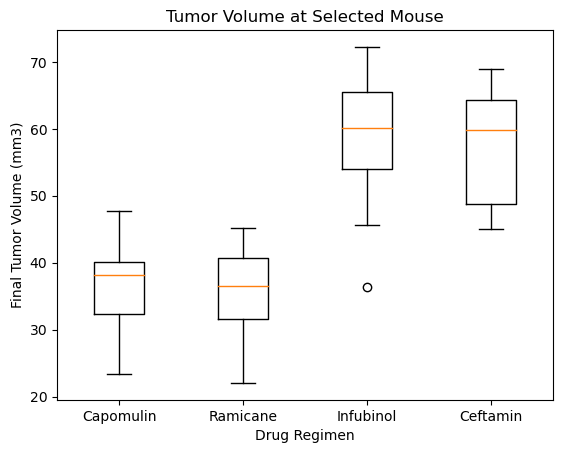

In [86]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = []
for drug in drug_list:
    boxplot_list.append(list(last_timepoint[drug].dropna()))
    
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

fig, ax = plt.subplots()
ax.set_title('Tumor Volume at Selected Mouse')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xlabel('Drug Regimen')
ax.boxplot(boxplot_list, labels=drug_list, widths = 0.4, vert=True)
plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

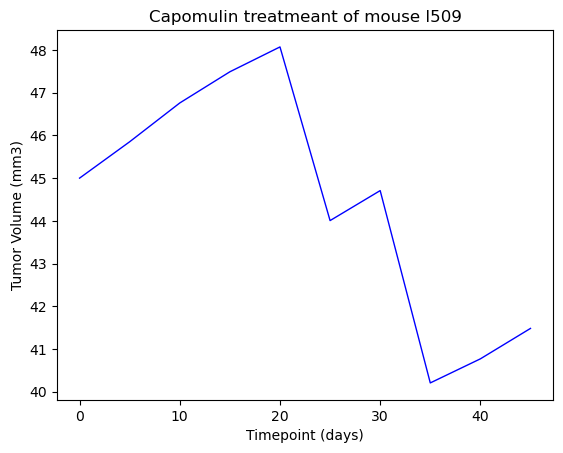

In [85]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

line_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
x_axis = line_df["Timepoint"]
tumer_siz = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumer_siz,linewidth=1,color="blue")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

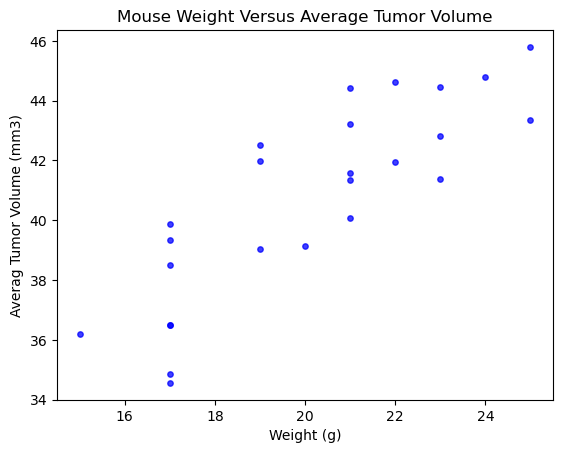

In [103]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

fig2, ax2 = plt.subplots()
avg_vol_Capomulin =Capomulin_df.groupby(['Mouse ID']).mean()


plt.scatter(avg_vol_Capomulin['Weight (g)'],avg_vol_Capomulin['Tumor Volume (mm3)'], color="blue",s=15,alpha=0.75)
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

In [104]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_vol_Capomulin['Weight (g)'],avg_vol_Capomulin['Tumor Volume (mm3)'])
correlation


PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712483e-07)

The correlation between mouse weight and the average tumor volume is 0.84
The r-squared is: 0.709


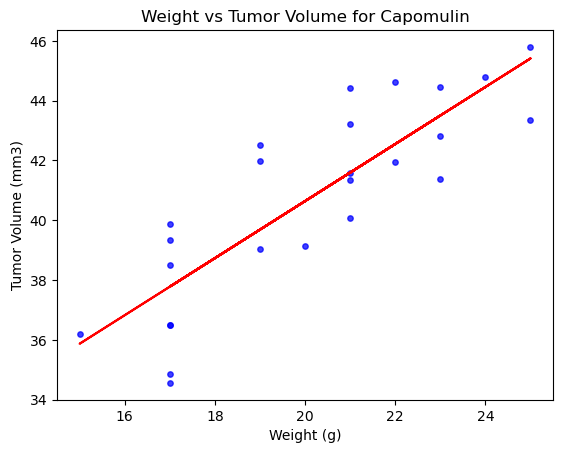

In [105]:
from scipy import stats
(slope, intercept,rvalue, pvalue, stderr)= stats.linregress(avg_vol_Capomulin["Weight (g)"],avg_vol_Capomulin["Tumor Volume (mm3)"])
regress_values=avg_vol_Capomulin["Weight (g)"]* slope + intercept

plt.scatter(avg_vol_Capomulin["Weight (g)"],avg_vol_Capomulin["Tumor Volume (mm3)"],color='b',s=15,alpha=0.75)
plt.plot(avg_vol_Capomulin["Weight (g)"], regress_values, color='red')

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()